# Movie Data Analysis Project


![](https://image.ibb.co/gzWCV7/0b8f3ae1_f58d_4760_ab09_dfafb5b16e02_bw_JODJ6.png)

![](https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png)

![](https://tmdb.eu/images/logo.png)

## Description

This project analyzes multiple features of movies, including release date, budget, revenue, boxoffice, rating, audience_score etc. 

The data was extracted and collected from mainstream movie rating websites: Rotten Tomato, IMDB and TMDB.

The project primarily addresses these questions:
    
    1). Taste difference: do a lot of movies have large rating gap between professional and non-profissional audiences? How does this affect box office? 
    2). Does a large budget movie lead to high boxoffice?
    3). What is the relationship between BoxOffice and Rating? Should producers invest more on marketing to promote rating, and thus getting a larger BoxOffice?
    4). Does seasonality affect the performance of a movie?

## Dependencies

In [39]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mvdata=pd.read_csv('/Users/apple/Desktop/CBS2019spring/regression analysis/Movie_analysis_project-master/moviedata.csv')

## Data description

The data is extracted from three websites: Rotten Tomato, IMDB, TMDB between 2012 and 2017. 

The columns include:
    
    Movie: the name of the movie
    Release_date
    Language
    Runtime: the duration of the movie
    Budget
    Revenue
    Genre
    Rating
    Votes: how many votes the movie has got
    BoxOffice
    meter_score: This score is based on the opinions of hundreds of film and television critics
    audience_score: This score is based on all audience. It is the percentage of all users who have rated the movie or TV Show positively.


In [5]:
mvdata=mvdata.drop_duplicates(subset='Movie', keep='first', inplace=False) #drop duplicate lines

In [6]:
mvdata['audience_score']=mvdata['audience_score']*100

In [7]:
mvdata=mvdata.drop(columns=['Unnamed: 0_x', 'Name', 'Unnamed: 0_y']) #drop unnecessary columns

In [8]:
mvdata=mvdata.rename(index=str, columns={'Unnamed: 0': 'ID'})# rename the column unnamed to ID

In [9]:
mvdata


,ID,Movie,Release_date,Language,Runtime,Budget,Revenue,Genre,Rating,Votes,BoxOffice,Year,meter_score,audience_score
0,0,the avengers,4-May-12,English,2h 23m,220000000.0,1.519558e+09,"Action, Adventure, Sci-Fi",8.1,1134273.0,623357910.0,2012.0,NaN,NaN
1,1,snow white and the huntsman,1-Jun-12,English,2h 7m,170000000.0,3.966000e+08,"Action, Adventure, Drama",6.1,253972.0,155332381.0,2012.0,48.0,52.0
2,2,the hobbit: an unexpected journey,14-Dec-12,English,2h 49m,250000000.0,1.021104e+09,"Adventure, Family, Fantasy",7.9,705872.0,303003568.0,2012.0,92.0,86.0
3,3,brave,22-Jun-12,English,1h 33m,185000000.0,5.389832e+08,"Animation, Adventure, Comedy",7.1,324942.0,237283207.0,2012.0,92.0,86.0
4,4,the dark knight rises,20-Jul-12,English,2h 45m,250000000.0,1.084939e+09,"Action, Thriller",8.4,1343225.0,448139099.0,2012.0,87.0,90.0
5,5,django unchained,11-Dec-12,English,2h 45m,100000000.0,4.253682e+08,"Drama, Western",8.4,1164954.0,162805434.0,2012.0,NaN,83.0
6,6,the amazing spider-man,4-Jul-12,English,2h 16m,215000000.0,7.522159e+08,"Action, Adventure, Sci-Fi",7.0,511325.0,262030663.0,2012.0,92.0,86.0
7,7,skyfall,9-Nov-12,English,2h 23m,200000000.0,1.108561e+09,"Action, Adventure, Thriller",7.8,580191.0,304360277.0,2012.0,92.0,86.0
8,8,sexual chronicles of a french family,1-Jun-12,French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0
9,9,the lorax,1-Mar-12,English,1h 26m,70000000.0,3.488403e+08,"Animation, Adventure, Comedy",6.4,87926.0,214030500.0,2012.0,NaN,83.0


In [267]:
mvdata.to_csv('/Users/apple/Desktop/CBS2019spring/regression analysis/Movie_analysis_project-master/moviedata(update).csv')  #index=False,header=False表示不保存行索引和列标题
# save data to a new file

## Descriptive analysis on boxoffice, rating, and audience_score

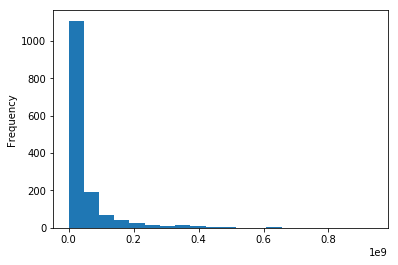

In [269]:
boxoffice.plot.hist(bins=20)

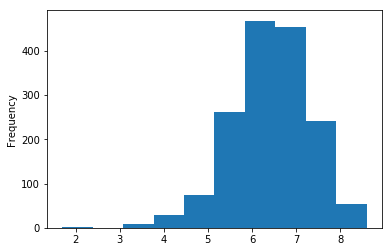

In [270]:
mvdata['Rating'].plot.hist(bins=10)

###  Comments:
Most ratings are concentrated between 6 and 7


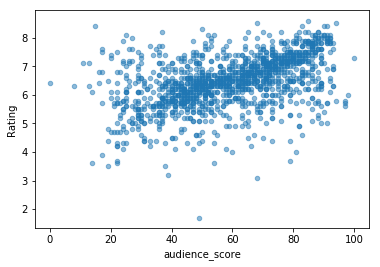

In [16]:
mvdata.plot.scatter(y='Rating',x='audience_score',alpha=.5)

# Section1: Meter_score vs Audience_score

### A higher meter_score means the movie is well-received by professional critics

### A high audience_score means the movie is well-received by common audiences

### This section examines the taste difference of the movies, and provides the descrptive reason that why the market is dominant with commercial movies.


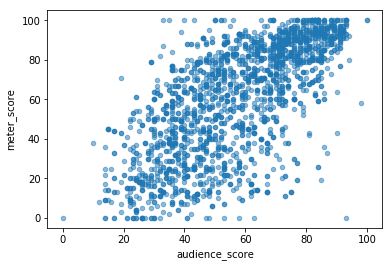

In [18]:
mvdata.plot.scatter(y='meter_score',x='audience_score',alpha=0.5)

In [19]:
print(smf.ols('meter_score ~ audience_score', data=mvdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            meter_score   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:17:36   Log-Likelihood:                -10417.
No. Observations:                2356   AIC:                         2.084e+04
Df Residuals:                    2354   BIC:                         2.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6848      1.292      2.

In [20]:
print(smf.ols('audience_score ~ meter_score', data=mvdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         audience_score   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:17:38   Log-Likelihood:                -9582.7
No. Observations:                2356   AIC:                         1.917e+04
Df Residuals:                    2354   BIC:                         1.918e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      28.1320      0.699     40.255      

### Method definition:

I'd like to find out those movies that has large discrepancy in meter_score and audience_score, because it represents the taste of professionals and average audience.

So I add a variable that is 'audience_score - meter_score', and I name it "taste difference"

A high "taste difference" means the movie is well received commercially, but not critically. (叫坐不叫好)

A low "taste difference" means the movie is well received critically, but not commercially.（叫好不叫座）

In [21]:
mvdata['taste difference']=mvdata['audience_score']-mvdata['meter_score']


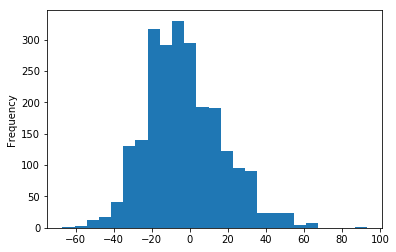

In [22]:
mvdata['taste difference'].plot.hist(bins=25)


In [23]:
mvdata['taste difference'].median()

-6.0

### Comments:

This graph shows that the mean is skewed to the left, indicating that generally the audience_score is less than the meter_score. It shows that somehow the overall audience seem to be more demanding than the professional movie commentator.


Further, to analyze those movies with huge gap between the average audience and professionals, 
I choose the movies with taste difference over 60 and below -60.



In [24]:
submv1=mvdata.loc[mvdata['taste difference'] < -60].iloc[:,[1,5,7,10,12,13,14]]
submv1.sort_values(by='taste difference')
submv1.count()
submv1['BoxOffice'].mean()

46500.0

In [25]:
submv2=mvdata.loc[mvdata['taste difference'] > 60].iloc[:,[1,5,7,10,12,13,14]]
submv2.sort_values(by='taste difference',ascending=False)
submv2.count()
submv2['BoxOffice'].mean()


5181916.833333333

### Comments:

Interestingly, we see from above that the average BoxOffice of the movies with low taste difference is only 46500, however the average boxoffice of the movies with high taste difference is 5181916.8, which is approximately 100 times of the lower taste difference movies. 

It relects the fact that commercial movies are always dominant in the movie market due to its profitability.

# Section 2: BoxOffice vs Budget

### Does a high budget movie lead to accordingly high BoxOffice?

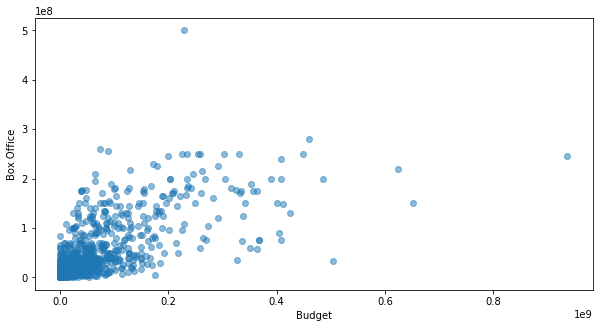

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(mvdata['BoxOffice'], mvdata['Budget'],alpha=0.5)
ax.set_xlabel('Budget')
ax.set_ylabel('Box Office')
plt.show()

### Comments:
Looking at the plot above, we can most of data points are lying bottom left side but there are points which are far from the population like top right corner.

So I get rid of those outliers.

### Using boxplot to identify the outlier

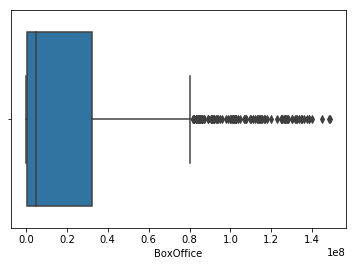

In [272]:

sns.boxplot(mvout2['BoxOffice'])

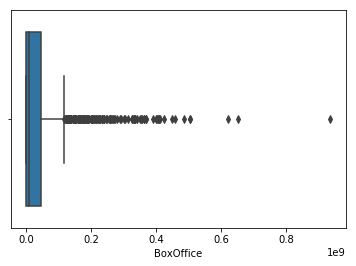

In [273]:
sns.boxplot(x=mvdata['BoxOffice'])

### Removing the outliers

In [29]:
## to get rid of the outliers, using IQR method to identify the outliers, and remove them
Q3=mvdata['Budget'].quantile(0.75)
Q1=mvdata['Budget'].quantile(0.25)
IQR = Q3-Q1
#mvdfout = mvdata[~(mvdata['Budget'] > (Q3 + 1.5 * IQR).any(axis=1)]
Q3+1.5*IQR

mvout = mvdata[~((mvdata['Budget'] < (Q1 - 3 * IQR)) |(mvdata['Budget'] > (Q3 + 3 * IQR)))]
mvout.shape

(3490, 15)

In [30]:
mvdata.shape #removed 3583-3415=168 outliers

(3583, 15)

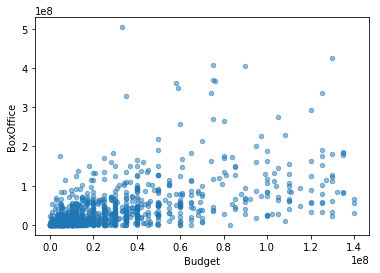

In [31]:
mvout.plot.scatter(y='BoxOffice',x='Budget',alpha=0.5)

In [32]:
# same method applying to BoxOffice
Q3=mvout['BoxOffice'].quantile(0.75)
Q1=mvout['BoxOffice'].quantile(0.25)
IQR = Q3-Q1
#mvdfout = mvdata[~(mvdata['Budget'] > (Q3 + 1.5 * IQR).any(axis=1)]
Q3+3*IQR

mvout2 = mvout[~((mvout['BoxOffice'] < (Q1 - 3 * IQR)) |(mvout['BoxOffice'] > (Q3 + 3 * IQR)))]
mvout2.shape # mvout2 is the dataset that deletes all boxoffice and budget outliers.

(3438, 15)

In [274]:
mvout2

,ID,Movie,Release_date,Language,Runtime,Budget,Revenue,Genre,Rating,Votes,BoxOffice,Year,meter_score,audience_score,taste difference
8,8,sexual chronicles of a french family,1-Jun-12,French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,26.0
10,10,hotel transylvania,28-Sep-12,English,1h 31m,85000000.0,358375603.0,"Animation, Comedy, Family",7.1,197900.0,148313048.0,2012.0,44.0,72.0,28.0
13,13,mirror mirror,30-Mar-12,English,1h 46m,85000000.0,183018522.0,"Adventure, Comedy, Drama",5.6,77835.0,64935167.0,2012.0,NaN,28.0,NaN
15,15,i want you,22-Jun-12,Castilian,1h 15m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
16,16,argo,12-Oct-12,English,2h 0m,44500000.0,232324128.0,"Biography, Drama, Thriller",7.7,521869.0,136025503.0,2012.0,22.0,53.0,31.0
17,17,prometheus,8-Jun-12,English,2h 4m,130000000.0,403170142.0,"Adventure, Mystery, Sci-Fi",7.0,527789.0,126477084.0,2012.0,NaN,NaN,NaN
18,18,wrong turn 5: bloodlines,23-Oct-12,English,1h 31m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,26.0
24,24,life of pi,21-Nov-12,English,2h 7m,120000000.0,609016565.0,"Adventure, Drama, Fantasy",7.9,516627.0,124987023.0,2012.0,87.0,84.0,-3.0
25,25,silver linings playbook,25-Dec-12,English,2h 2m,21000000.0,236412453.0,"Comedy, Drama, Romance",7.7,605890.0,132092958.0,2012.0,92.0,86.0,-6.0
26,26,21 jump street,12-Mar-12,English,1h 49m,42000000.0,201585328.0,"Action, Comedy, Crime",7.2,465840.0,138447667.0,2012.0,22.0,53.0,31.0


### Scatter Plot and trendline after removing outliers

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


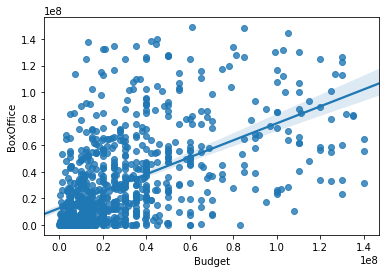

In [271]:
x = mvout2['Budget']
y = mvout2['BoxOffice']

sns.regplot(x,y)


### Conducting regression analysis 

In [106]:
print(smf.ols('BoxOffice ~ Budget',data=mvout2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     390.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.33e-72
Time:                        13:05:01   Log-Likelihood:                -17050.
No. Observations:                 917   AIC:                         3.410e+04
Df Residuals:                     915   BIC:                         3.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.263e+07   1.32e+06      9.590      0.0

### Comments:
Budget is statistically significant on 1% significance level. The coefficient indicates that an 1000 increase in Budget leads to a 638.6 increase in boxoffice. 

It makes sense as budget increase will not necessarily 100 percent land in boxoffice during the entire channel. 

R-sqaured is 29.9%, and F-stat is 390.1

### Adjusting the functional form by using log terms 

In [277]:
print(smf.ols('np.log(BoxOffice) ~ np.log(Budget)',data=mvout2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(BoxOffice)   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     250.3
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           5.17e-50
Time:                        12:41:31   Log-Likelihood:                -2022.6
No. Observations:                 917   AIC:                             4049.
Df Residuals:                     915   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4786      0.850      2.

### Comments:

Using the log form to see the percentage influence, I observed that when Budget increases by 1 percent, boxoffice will increase by 81 percent, and it is statistically significant.

### Adjusting the functional form by adding a square term

In [275]:
Budget_sq=mvout2['Budget']**2
print(smf.ols('BoxOffice ~ Budget + Budget_sq',data=mvout2).fit().summary()) #test if there's exponential relationship



                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     434.0
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           3.46e-79
Time:                        12:23:59   Log-Likelihood:                -17034.
No. Observations:                 917   AIC:                         3.407e+04
Df Residuals:                     915   BIC:                         3.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.287e-08   2.49e-09     25.213      0.0

### Comments:
Adding a square term imporve a little in R squared from 29% to 32.2%, and F-stat also increased from 390 to 434.

__Conclusion__: 

From the regressions above, we see a significant impact of budget on boxoffice. 

The answer to the question "Does a high budget movie lead to accordingly high BoxOffice?" is definitely "Yes"

# Section 3: Boxoffice vs Rating 
## Is there a significant relationship between boxoffice and rating?


### Scatter plot of boxoffice and rating

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


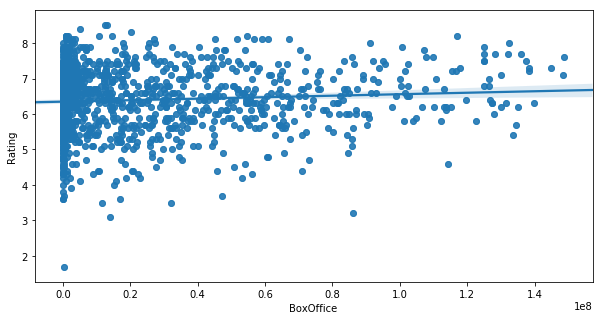

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(mvout2['BoxOffice'], mvout2['Rating'],alpha=0.5)
ax.set_xlabel('BoxOffice')
ax.set_ylabel('Rating')
sns.regplot(mvout2['BoxOffice'],mvout2['Rating'])

### Comments:
From the scatter plot, we can see that the trendline is only a little bit tilted upward, which means increase in boxoffice has very little impact on rating. It is not necesarily the case that higher boxoffice indicates a significantly higher rating.

However, we can observe that a movie is less likely to have a low rating, if the boxoffice of that movie is high.

### Regress rating on boxoffice

In [114]:
print(smf.ols('Rating ~ BoxOffice',data=mvdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     89.45
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           1.18e-20
Time:                        14:02:19   Log-Likelihood:                -1891.1
No. Observations:                1489   AIC:                             3786.
Df Residuals:                    1487   BIC:                             3797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3404      0.025    250.869      0.0

### Comments:
though the result shows that BoxOffice has a statistically significant impact on rating (P=0.000). The magnitude of the impact is very tiny(2.718e-09), which is also reflected in the scatter plot. 

This makes sense due to the different scale of rating and boxoffice. The former has small scale while the latter has a much bigger scale.

### Adjusting the form by using log term of BoxOffice

In [282]:
print(smf.ols('Rating ~ np.log(BoxOffice)',data=mvdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     69.64
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           1.53e-16
Time:                        13:35:48   Log-Likelihood:                -2028.5
No. Observations:                1591   AIC:                             4061.
Df Residuals:                    1589   BIC:                             4072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5432      0.11

### Comments:

To address the aforementioned scale issue, I used log term on boxoffice. It is more convenient to interpret the coefficient of boxoffice in this form: when boxoffice increases by 1 percent, the rating will increase by about 0.06.


### Regress Boxoffice on Rating

In [281]:
print(smf.ols('BoxOffice ~ Rating',data=mvdata).fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     94.17
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           1.14e-21
Time:                        13:20:12   Log-Likelihood:                -31103.
No. Observations:                1591   AIC:                         6.221e+04
Df Residuals:                    1589   BIC:                         6.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.219e+07   1.38e+07     -6.676      0.0

### Comments:

If we regress box office on rating, the coeffificients of both intercept and rating are statistically significant. The coefficient of rating is 2.059e+07, which means that 1 point increase in rating is associated with around 21million box office increase, though we do observe only 5.5% r squared.

__Omitted variable bias consideration__:

Considering the factors affecting boxoffice should not be limited to rating, there are other factors such as marketing, budget, movie cass, producer etc. also have an impact on the boxoffice, and are likely to positively related to rating. Therefore, rating may have an upward bias. We should take account into these factors when interpret the coefficient of rating.

In [123]:
print(smf.ols('Rating ~ audience_score + meter_score + Votes + Revenue + BoxOffice',data=mvdata).fit().summary())
            
              

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          1.35e-107
Time:                        16:01:51   Log-Likelihood:                -1097.5
No. Observations:                1045   AIC:                             2207.
Df Residuals:                    1039   BIC:                             2237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1106      0.073     69.

### Comments:

In the regression above, I included audience_score, meter_score, Votes, BoxOffice and Revenue as independent variables. Adjusted R-squared has imporved by 32.8%. The audience_score, meter_score, and votes are statistically significant, among which audience_score has the largest impact magnitude. Nevertheless, Boxoffice and Revenue are not statistically significant in this regression.

__Conclusion__:

There is significant relationship between boxoffice and rating. Boxoffice has a very tiny impact on rating, that is to say, rating relies on a relatively small portion of boxoffice.

Nevertheless, Rating has a much bigger impact on BoxOffice, which is both statistically and economically significant. 

# Section 4: Seasonality

## This section explores the potential relationship between boxoffice and seasonality.  Is there significant discrepancy of boxoffice among the four seasons?

### Using regular expression to extract 'month' data in release_date, and create a dummy variable called "season"  

In [40]:

import re

def getseason(path):
    df = pd.read_csv(path)
    season=[]
    for i in df['Release_date']:
        pattern = r'Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec'                
        match= re.findall(pattern, i)
    
        if match[0] == 'Mar' or match[0] =='Apr' or match[0] =='May':
            season.append('Spring')
        elif match[0] == 'Jun' or match[0] =='Jul' or match[0] =='Aug':
            season.append('Summer')
        elif match[0] == 'Sep' or match[0] =='Oct' or match[0] == 'Nov':
            season.append('Fall')
        elif match[0] =='Dec' or match[0] =='Jan' or match[0] =='Feb':
            season.append('Winter')
        else:
            season.append('m')
    df['Season']=season
    return df
    

In [66]:
path= '/Users/apple/Desktop/CBS2019spring/regression analysis/Movie_analysis_project-master/moviedata(update).csv'
df=getseason(path)


In [65]:
df['Season']

0       Spring
1       Summer
2       Winter
3       Summer
4       Summer
5       Winter
6       Summer
7         Fall
8       Summer
9       Spring
10        Fall
11        Fall
12      Summer
13      Spring
14        Fall
15      Summer
16        Fall
17      Summer
18        Fall
19        Fall
20      Summer
21      Spring
22      Spring
23        Fall
24      Winter
25      Spring
26      Summer
27        Fall
28      Summer
29      Winter
         ...  
3553      Fall
3554    Winter
3555    Summer
3556    Winter
3557    Summer
3558      Fall
3559    Winter
3560    Spring
3561    Summer
3562    Winter
3563    Winter
3564      Fall
3565    Spring
3566    Summer
3567    Winter
3568    Summer
3569    Summer
3570    Spring
3571    Summer
3572    Winter
3573      Fall
3574      Fall
3575      Fall
3576    Summer
3577      Fall
3578      Fall
3579      Fall
3580    Spring
3581    Spring
3582    Spring
Name: Season, Length: 3583, dtype: object

### Descriptive anlysis on "season"

In [43]:
df['Season'].value_counts()

Fall      1056
Winter     897
Spring     880
Summer     750
Name: Season, dtype: int64

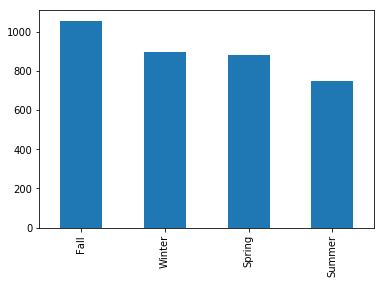

In [287]:
df['Season'].value_counts().plot(kind='bar')

### Comments:
There were 1056 movies released in summer during the past couple of years, around 900 movies released in Winter and Spring respectively. Surprisingly, there was only 750 movies released in summer, which ranked the last among all seasons.

### Regress BoxOffice on Season

In [67]:

print(smf.ols('BoxOffice ~ Season',data=df).fit().summary())
                          

                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.475
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           0.000966
Time:                        18:52:12   Log-Likelihood:                -29158.
No. Observations:                1489   AIC:                         5.832e+04
Df Residuals:                    1485   BIC:                         5.835e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.477e+07   3.74e+06  

### Regress BoxOffice on Season, controling for audience score and budget

In [68]:
print(smf.ols('BoxOffice ~ Season + audience_score + Budget',data=df).fit().summary())
            
              

                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          1.61e-138
Time:                        18:53:00   Log-Likelihood:                -18895.
No. Observations:                 975   AIC:                         3.780e+04
Df Residuals:                     969   BIC:                         3.783e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.374e+07   7.59e+06  

### Comments:
When I regressed boxoffice on season, I found that only the coefficient for summer was statistically significantly different from fall regarding boxoffice.

Interestingly, after controling for audience_score and Budget, the box office spread by seasons didn't vary a lot. The expected boxoffice is not significantly different for different seasons.

# Conclusion


Here are my answers to the questions in the beginning of the projects:
    
    1). Taste difference: do a lot of movies have large rating gap between professional and non-profissional audiences? How does this affect boxoffice? 
    
    Ans: If we define a "large gap" movie to be those movies that has a score difference over 60, we have 10 movies in total that have extreme discrepancy view between professionals and nonprofessionals.
        Generally, from my analysis, movies with high "taste difference" has a higher boxoffice.
    
    2). Does a large budget movie lead to high boxoffice?
    
    Ans: Yes, a large budget leads to a high boxoffice. It makes sense because it tends to be very rare when a movie has large investments but yields low return.
    
    3). What is the relationship between BoxOffice and Rating? Should producers invest more on marketing to promote rating, and thus getting a larger BoxOffice?
    
    Ans: Boxoffice has a tiny but signifcant impact on rating, while rating has greater impact on boxoffice both in magnitude and statistically. According to my analysis, I think it is reasonable for investors to attach importance to the publicity and marketing due to its great impactness.
    
    4). Does seasonality affect the performance of a movie?
    
    Ans: Not necessary. Controlling for audience_score nad Budget, boxoffice is not significantly different among different seasons.

# Thanks for reading